In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('new_placement.csv')

In [5]:
df.sample(5)

,IQ,CGPA,Internship_Experience,Projects_Completed,Placement
2571,78,4.98,No,2,No
8058,102,8.92,Yes,0,No
8473,91,5.53,No,1,No
4606,94,6.05,No,4,No
6027,77,6.56,Yes,5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IQ                     10000 non-null  int64  
 1   CGPA                   10000 non-null  float64
 2   Internship_Experience  10000 non-null  object 
 3   Projects_Completed     10000 non-null  int64  
 4   Placement              10000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [7]:
df.shape
df.head()

,IQ,CGPA,Internship_Experience,Projects_Completed,Placement
0,107,6.28,No,4,No
1,97,5.37,No,0,No
2,109,5.83,No,1,No
3,122,5.75,Yes,1,No
4,96,7.69,No,2,No


In [8]:
# df = df.iloc[:,1:]

In [9]:
df.head()

,IQ,CGPA,Internship_Experience,Projects_Completed,Placement
0,107,6.28,No,4,No
1,97,5.37,No,0,No
2,109,5.83,No,1,No
3,122,5.75,Yes,1,No
4,96,7.69,No,2,No


In [11]:
df['Placement'].value_counts()


Placement
No     8341
Yes    1659
Name: count, dtype: int64

In [12]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [13]:
x

,IQ,CGPA,Internship_Experience,Projects_Completed
0,107,6.28,No,4
1,97,5.37,No,0
2,109,5.83,No,1
3,122,5.75,Yes,1
4,96,7.69,No,2
...,...,...,...,...
9995,119,8.29,No,0
9996,70,9.34,No,2
9997,89,6.25,Yes,5
9998,107,8.92,No,1


In [14]:
y

0        No
1        No
2        No
3        No
4        No
       ... 
9995    Yes
9996     No
9997     No
9998     No
9999     No
Name: Placement, Length: 10000, dtype: object

In [15]:
y.shape

(10000,)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [18]:
x_train

,IQ,CGPA,Internship_Experience,Projects_Completed
8701,91,6.23,No,2
3429,116,7.39,No,1
8870,115,7.07,No,2
6962,107,7.48,No,5
2088,93,7.28,No,5
...,...,...,...,...
5734,91,9.72,No,1
5191,99,7.36,No,0
5390,89,6.66,Yes,5
860,103,7.57,No,2


In [19]:
y_train

8701    No
3429    No
8870    No
6962    No
2088    No
        ..
5734    No
5191    No
5390    No
860     No
7270    No
Name: Placement, Length: 8500, dtype: object

In [21]:
x_test

,IQ,CGPA,Internship_Experience,Projects_Completed
6252,139,7.24,No,4
4684,84,8.49,Yes,5
1731,94,5.66,No,4
4742,100,6.29,Yes,3
4521,116,6.39,No,5
...,...,...,...,...
967,127,9.11,Yes,4
6043,94,8.22,No,4
6879,75,7.14,No,2
6775,112,6.26,Yes,3


In [22]:
y_test

6252     No
4684     No
1731     No
4742     No
4521    Yes
       ... 
967     Yes
6043    Yes
6879     No
6775    Yes
3295     No
Name: Placement, Length: 1500, dtype: object

In [23]:
x_train['Internship_Experience'] = x_train['Internship_Experience'].map({'Yes':1,'No':0})
x_test['Internship_Experience'] = x_test['Internship_Experience'].map({'Yes':1,'No':0})

In [24]:
y_train = y_train.map({'Yes':1,'No':0})
y_test = y_test.map({'Yes':1,'No':0})

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train

,IQ,CGPA,Internship_Experience,Projects_Completed
8701,91,6.23,0,2
3429,116,7.39,0,1
8870,115,7.07,0,2
6962,107,7.48,0,5
2088,93,7.28,0,5
...,...,...,...,...
5734,91,9.72,0,1
5191,99,7.36,0,0
5390,89,6.66,1,5
860,103,7.57,0,2


In [28]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_train

array([[-0.56821151, -0.88365871, -0.80712294, -0.30033435],
       [ 1.09137595, -0.09425525, -0.80712294, -0.88145021],
       [ 1.02499246, -0.31202172, -0.80712294, -0.30033435],
       ...,
       [-0.7009785 , -0.59103501,  1.23896862,  1.44301323],
       [ 0.22839047,  0.02823839, -0.80712294, -0.30033435],
       [-1.69673098, -0.71352865,  1.23896862, -1.46256607]],
      shape=(8500, 4))

In [32]:
x_test = scaler.transform(x_test)

c:\Users\maanv\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
x_test

array([[-6.43530483, -5.25690845, -2.45857039, -0.96170384],
       [-6.67767712, -4.67802374,  1.7279203 , -0.6240082 ],
       [-6.63360943, -5.98861873, -2.45857039, -0.96170384],
       ...,
       [-6.71733804, -5.30321923, -2.45857039, -1.63709512],
       [-6.55428759, -5.71075407,  1.7279203 , -1.29939948],
       [-6.68208389, -5.74780269, -2.45857039, -2.31248641]],
      shape=(1500, 4))

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()

In [37]:
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
x_pred = clf.predict(x_test)

In [39]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    1
       ..
967     1
6043    1
6879    0
6775    1
3295    0
Name: Placement, Length: 1500, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,x_pred)

0.8366666666666667

<Figure size 600x400 with 0 Axes>

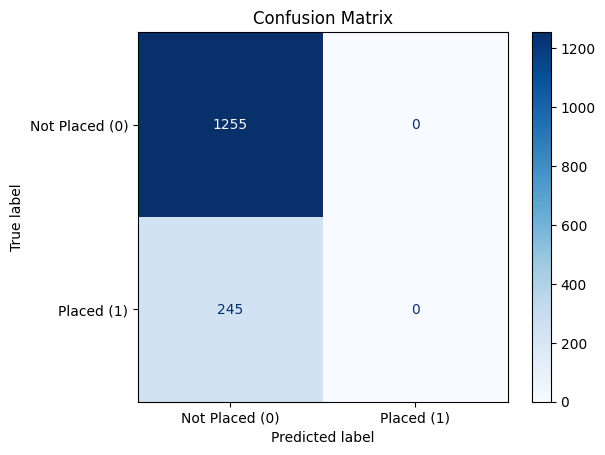

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(x_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Placed (0)', 'Placed (1)'])

plt.figure(figsize=(6,4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

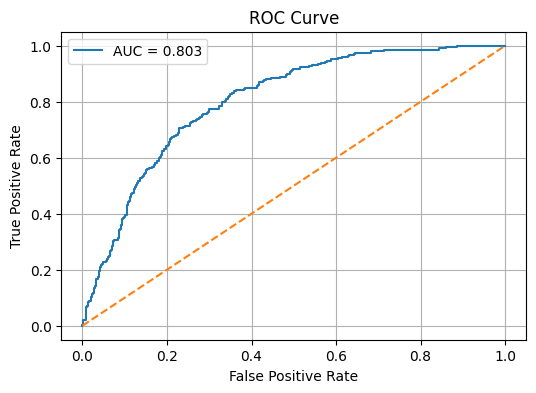

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import pickle
import joblib

In [ ]:
pickle.dump(clf,open('new_reg_model.pkl','wb'))
joblib.dump(scaler, 'new_reg.pkl')

['new_reg.pkl']